## Introducing

```
=============================================================================================================================================================
Graded Challenge 7

Nama  : Dwi Hastuti
Batch : 024

==============================================================================================================================================================

```

### Objective

Spotify, sebagai salah satu layanan streaming musik terbesar, menghadapi persaingan yang sangat ketat dengan banyaknya pilihan layanan musik lainnya, termasuk masuknya audiobooks dan peningkatan kualitas suara melalui teknologi seperti Dolby Atmos dan audio lossless. Untuk tetap unggul dalam persaingan ini, Spotify perlu lebih memahami bagaimana penggunanya merasa tentang berbagai fitur yang mereka tawarkan, mulai dari musik, podcast, audiobook, hingga pengalaman penggunaan secara keseluruhan. Spotify dapat memanfaatkan analisis sentimen untuk menganalisis umpan balik dari pengguna di platform mereka, seperti komentar, ulasan, atau percakapan di media sosial, dan mengidentifikasi opini atau perasaan pengguna terhadap berbagai fitur yang ditawarkan. Dengan memahami sentimen ini—apakah pengguna merasa puas, kecewa, atau bahkan bingung—Spotify dapat lebih mudah menyesuaikan strategi dan fitur mereka. Misalnya, jika analisis sentimen menunjukkan bahwa spotify kurang mendapat respons positif dari pengguna karena adanya bug, Spotify agar melakukan perbaikan atau penyesuaian dalam layanan tersebut. (source: https://www.cnet.com/tech/services-and-software/best-music-streaming-service/) <br>

Dengan memanfaatkan analisis sentimen salah satunya, Long Short-Term Memory (LSTM) semakin populer. LSTM sangat efektif untuk berbagai masalah dan kini banyak diterapkan. Jaringan ini dirancang khusus untuk mengatasi masalah ketergantungan jangka panjang dalam data urutan. Mengingat informasi dalam waktu lama adalah kemampuan dasar LSTM, bukan sesuatu yang sulit untuk dipelajari. Recurrent Neural Networks (RNN), yang menjadi dasar LSTM, terdiri dari serangkaian modul jaringan saraf yang diulang, dengan modul RNN yang sederhana menggunakan single tanh layer. (source: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://pdfs.semanticscholar.org/0027/d572e43d0c120d59e81c228f2a17b3b05006.pdf) <br>

Project ini memanfaatkan analisis sentimen menggunakan LSTM kemudian model lstm dilakukan improvement dengan transfer learning, kemudian melihat hasil klasifikasi di model evaluasi. Dari hasil model prediksi lstm ini diharapkan Spotify dapat meningkatkan layanan , menciptakan fitur yang lebih disukai, serta memberikan pengalaman yang lebih memuaskan bagi penggunanya. Hal ini dapat membantu Spotify untuk terus mempertahankan posisi  sebagai layanan streaming musik terdepan di tengah persaingan yang semakin ketat.

### Dataset

Untuk dataset diambil dari kaggle https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022, hasil dari scrapping Spotify reviews pada Google Play Store.
| Column           | Description                                                 |
|------------------|-------------------------------------------------------------|
| Time_submitted          | At what time the review was submitted                                  |
| Review     | Review text                                    |
| Rating | Given score (1-5)      |
| Total_thumbsup        | How many people found the review helpful                                   |
| Reply   | Review reply                                              |

## Import Libraries

In [ ]:
# # Install TensorFlow versi 2.15
# !pip install tensorflow==2.15

# import tensorflow as tf
# print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
#Libraries
import numpy as np
import pandas as pd
import re
import string
import nltk

#Daviz Libraries

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text Processing
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')

# TensorFlow & Keras
import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Reshape

# Check TensorFlow version
print(tf.__version__)


2.15.1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\halod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\halod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Loading

In [27]:
df = pd.read_csv(r'D:\hactiv8\gc\p2-ftds024-hck-gc7-dwihst\reviews.csv')
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [28]:
df.Review.value_counts()

Review
Too many ads                                                                                                                                                                                                                36
Too much ads                                                                                                                                                                                                                15
Amazing music app                                                                                                                                                                                                            9
Very good music app                                                                                                                                                                                                          8
Great music selection                                                                                

In [29]:
#check duplikat
df.duplicated().sum()

0

## EDA

### Distribution of Rating Spotify

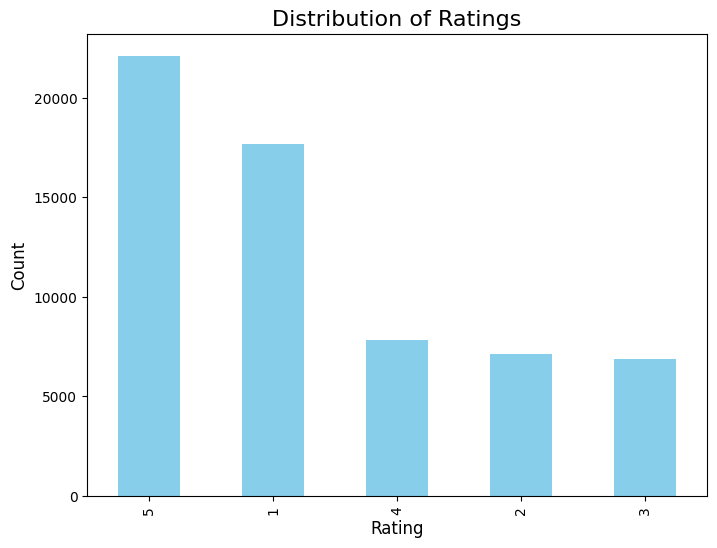

In [30]:
#check jumlah rating
rating_counts = df.Rating.value_counts()

#bar chart
plt.figure(figsize=(8, 6))  #ukuran plot
rating_counts.plot(kind='bar', color='skyblue')

# Menambahkan label dan judul
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

#menampilkan plot
plt.show()

Pola ini sering terjadi dalam ulasan aplikasi atau produk, pengguna lebih cenderung memberi rating sangat tinggi atau sangat rendah, tergantung pada pengalaman pengguna. Rating 1 dan rating 5 lebih mewakili sentimen negatif dan positif secara ekstrem, dibandingkan dengan rating 2, 3, dan 4 yang cenderung mengarah pada sentimen netral atau tidak memberikan dampak signifikan. Sebagian besar pengguna lebih cenderung memberikan rating 1 atau 5 karena pengguna merasa sangat tidak puas atau sangat puas dengan aplikasi tersebut. Sementara itu, rating 2, 3, dan 4 sering kali tidak mencerminkan perasaan yang kuat, karena banyak pengguna yang tidak merasa perlu memberikan feedback jika aplikasi hanya dianggap "cukup baik" atau "biasa saja". Dalam banyak kasus, pengguna yang memberikan rating 1 biasanya memiliki masalah atau ketidakpuasan tertentu, sementara rating 5 diberikan oleh pengguna yang sangat puas dengan aplikasi. Hal ini didukung oleh fakta bahwa banyak pengguna yang tidak memberikan rating sama sekali jika aplikasi hanya sekadar "cukup" atau "baik" (https://www.digitalworkroom.co.uk/blogs/how-to-turn-a-one-star-app-store-rating-into-five-stars). **Oleh karena itu, untuk menghindari bias dan fokus pada sentimen yang lebih jelas, hanya data dengan rating 1 dan 5 yang akan digunakan dalam analisis ini.**


### Word Cloud Negatif

In [31]:
# Menghapus baris yang rating-nya bukan 1 atau 5
df_filtered = df[df['Rating'].isin([1, 5])]

df_filtered

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
6,2022-07-09 13:19:21,I love the selection and the lyrics are provid...,5,0,NaN
...,...,...,...,...,...
61586,2022-01-01 04:41:44,One day I was able to switch between songs and...,1,0,NaN
61587,2022-01-01 04:35:47,It was my favourite app. I feel sorry for arti...,1,7,NaN
61588,2022-01-01 03:49:27,Back to one frkng star. First of all there's t...,1,14,NaN
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN


In [32]:
#data negatif
data_negatif = df_filtered[df_filtered['Rating']==1]
data_negatif

,Time_submitted,Review,Rating,Total_thumbsup,Reply
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
9,2022-07-09 13:11:32,"I'm deleting this app, for the following reaso...",1,318,NaN
11,2022-07-09 13:10:50,Can't play Spotify when on WiFi,1,1,NaN
12,2022-07-09 13:09:56,I had amazon premium music family package and ...,1,7,NaN
...,...,...,...,...,...
61586,2022-01-01 04:41:44,One day I was able to switch between songs and...,1,0,NaN
61587,2022-01-01 04:35:47,It was my favourite app. I feel sorry for arti...,1,7,NaN
61588,2022-01-01 03:49:27,Back to one frkng star. First of all there's t...,1,14,NaN
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN


In [33]:
# Word Cloud Data Negatif Sebelum Diolah

word_sebelum_diolah_negatif = pd.Series(" ".join(data_negatif['Review']).split())
len(word_sebelum_diolah_negatif)

653754

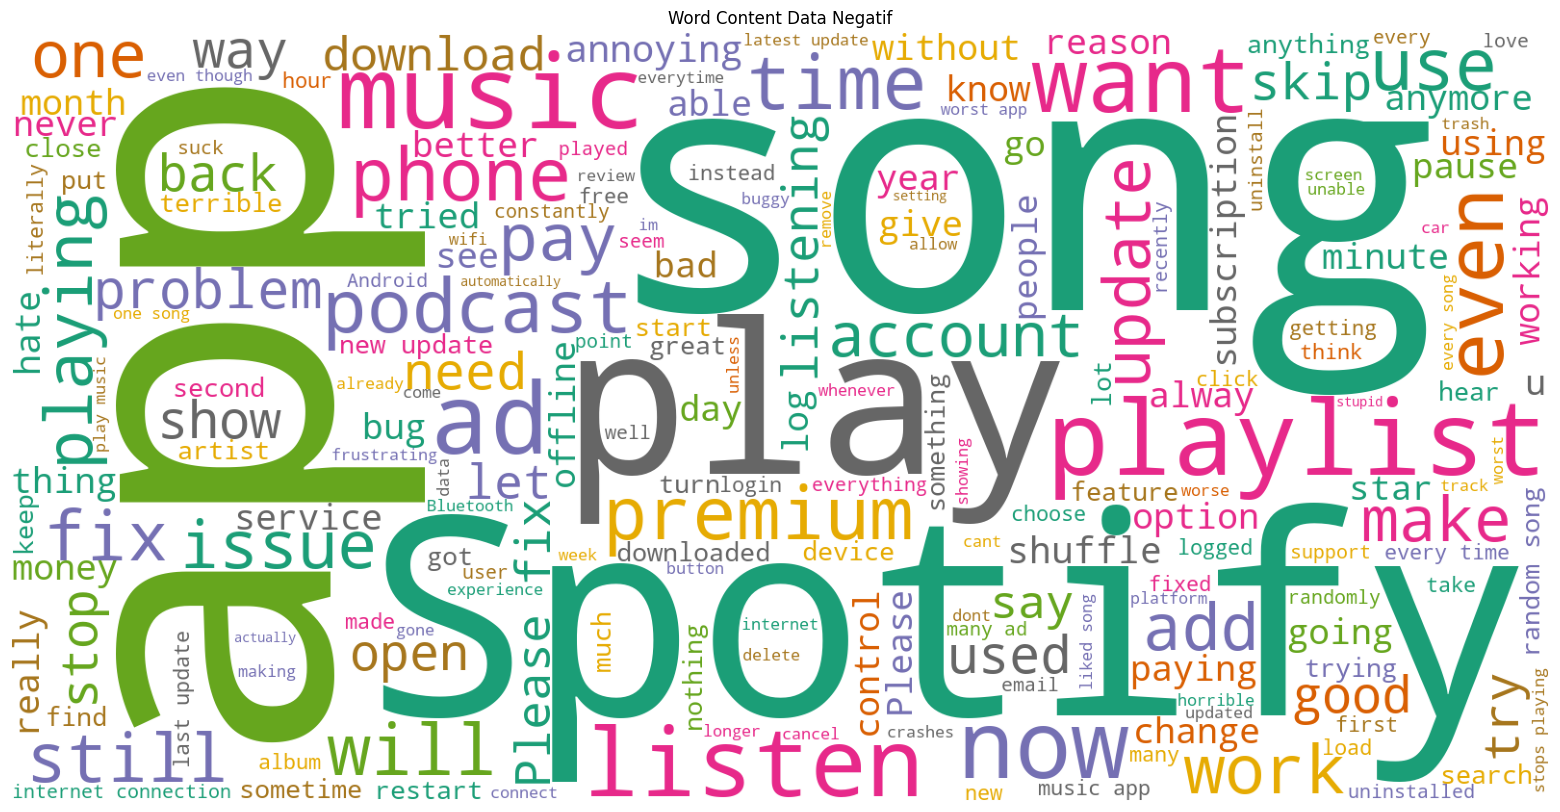

In [ ]:
# WORDCLOUD CONTENT DATA NEGATIF SEBELUM DIOLAH

data_sebelum_diolah_negatif = " ".join(word_sebelum_diolah_negatif)

#wordcloud
wordcloud_negatif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2").generate(data_sebelum_diolah_negatif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Data Negatif")
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.show()

- Kata-kata seperti "app", "song", "playlist", "Spotify", dan "play" kemungkinan bahwa banyak review negatif membahas tentang aplikasi dan fitur pemutaran lagu atau playlist.
- Kata seperti "pay", "premium", dan "money" kemungkinan pengguna adanya keluhan tentang biaya layanan.
- Kata "issue", "problem", "fix", "bug", dan "crashes" menunjukkan pengguna mengalami gangguan teknis.
- Kata "account", "logged", "uninstalled", dan "login" kemungkinan pengguna kesulitan masuk atau logout dari aplikasi. <br>

Word cloud ini dapat memberikan isu utama dalam review negatif pada app Spotify, seperti masalah teknis (bug & error), pengalaman pengguna terkait fitur shuffle dan skip, serta keluhan tentang pembayaran dan akun premium. Ini bisa menjadi saran untuk tim developer Spotify untuk meningkatkan layanan.

### Word Cloud Positif

In [36]:
#data positif
data_positif = df_filtered[df_filtered['Rating']==5]
data_positif

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
6,2022-07-09 13:19:21,I love the selection and the lyrics are provid...,5,0,NaN
8,2022-07-09 13:16:49,It's a great app and the best mp3 music app I ...,5,0,NaN
14,2022-07-09 13:08:32,i hav any music that i like it is super🙌,5,0,NaN
...,...,...,...,...,...
61574,2022-01-01 10:51:27,"Spotify has all the music I need, always up to...",5,0,NaN
61575,2022-01-01 10:45:47,"It literally has every song,genre,podcast that...",5,6,NaN
61579,2022-01-01 09:17:53,I've been using Spotify for about 3+ years now...,5,26,NaN
61581,2022-01-01 08:19:37,This app has remixes from Music Artist that I'...,5,0,NaN


In [ ]:
# Word Cloud positif data asli sebelum diolah

word_sebelum_diolah_positif = pd.Series(" ".join(data_positif['Review']).split())
len(word_sebelum_diolah_positif)

472057

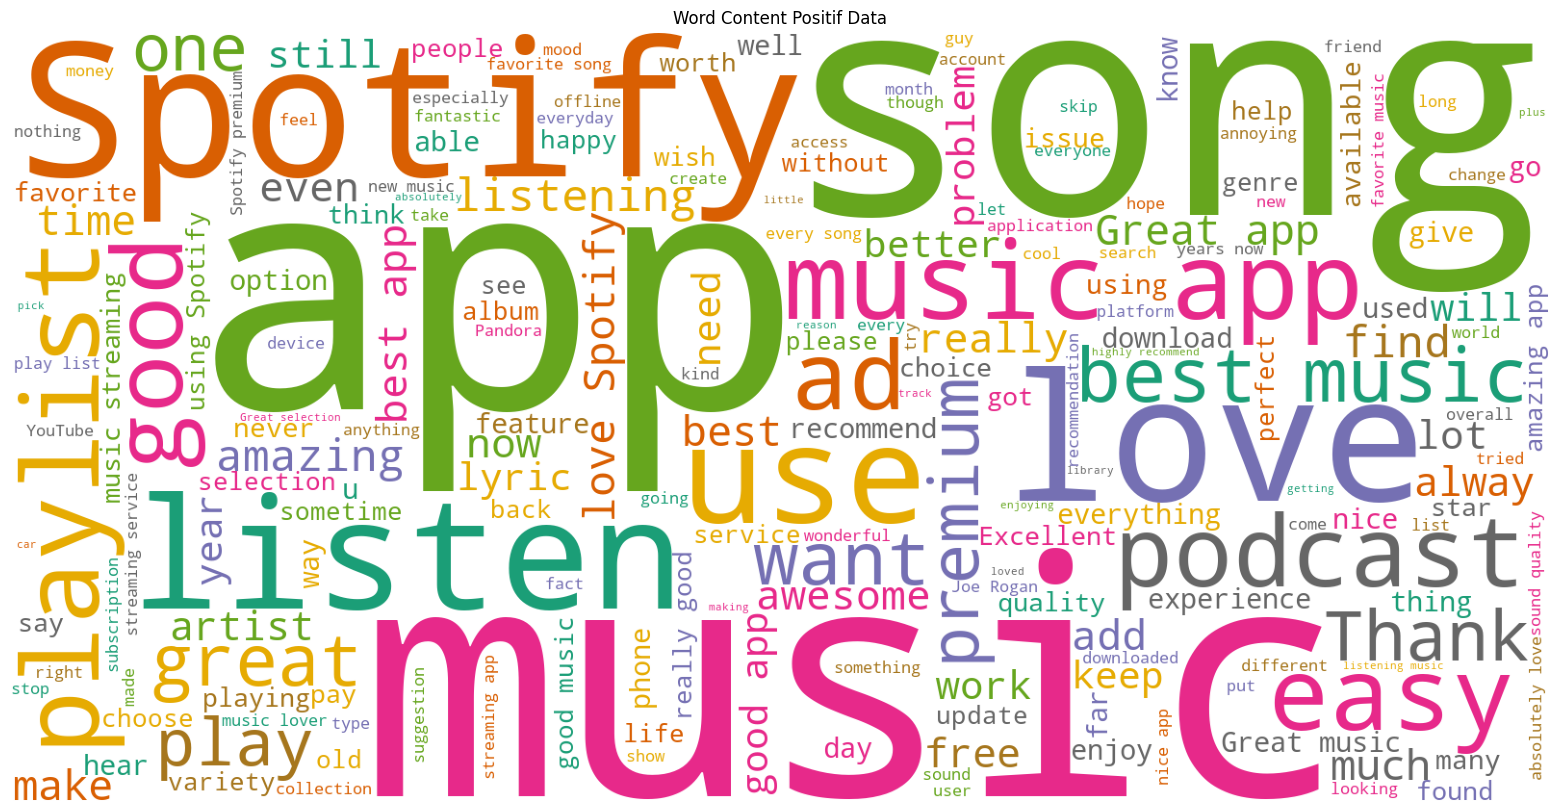

In [13]:
# WORDCLOUD CONTENT POSITIF DATA SEBELUM DIOLAH

data_sebelum_diolah_positif = " ".join(word_sebelum_diolah_positif)

# Bigram (per dua kata) -> "collocations = True"
wordcloud_positif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2").generate(data_sebelum_diolah_positif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Positif Data")
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.show()

- Kata  "easy", "great", "amazing", "awesome", dan "best" menunjukkan bahwa banyak pengguna merasa puas dengan their experience using Spotify app.
- Kata "love", "premium", "good", "thank", "feature", dan "playlist" pengguna menyukai fitur premium, koleksi lagu, serta kemudahan dalam membuat playlist.
- Kata "podcast" muncul besar, berarti fitur podcast di Spotify mendapatkan banyak ulasan positif.
- Kata  "available", "find", "use", dan "download" menunjukkan pengguna merasa mudah menemukan dan mengakses musik.

Dari word cloud ini, terlihat bahwa Spotify mendapat banyak apresiasi atas kemudahan penggunaan, fitur playlist, koleksi musik lengkap, serta layanan premium dan podcast. Tim developer spotify dapat menambahkan rekomendasi podcast sesuai history pengguna maupun review tentang podcast yang pengguna harus dengarkan. 

## Feature Enginering

Pada NLP, proses feature engineering melibatkan pengubahan teks mentah menjadi representasi numerik yang bisa digunakan oleh model untuk mempelajari pola dan membuat prediksi yang lebih akurat.Feature engineering adalah langkah penting dalam preprocessing data teks, karena kualitas fitur yang dihasilkan dapat sangat mempengaruhi kemampuan model dalam analisis sentimen atau ekstraksi informasi.

### Stopwords

Stopwords merupakan kata yang diabaikan dalam pemrosesan dan biasanya disimpan di dalam stop lists. Stop list ini berisi daftar kata umum yang mempunyai fungsi tapi tidak mempunyai arti. Kata-kata seperti “the,” “and,” dan “is,” dianggap tidak efektif untuk menyampaikan informasi penting. Dalam stopword juga dapat menambahkan kata-kata seperti "dear, really" <br>

sumber: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [46]:
# Define Stopwords
## Load Stopwords from NLTK

from nltk.corpus import stopwords
stop_words_en = stopwords.words("english")

print('Stopwords from NLTK')
print(len(stop_words_en), stop_words_en)
print('')

## Create A New Stopwords
new_stop_words = ["didnt", 'wont', 'doesnt', 'dear', 'ive', 'really', 'youre', 'couldnt', 'cant']

## Merge Stopwords
stop_words_en = stop_words_en + new_stop_words
stop_words_en = list(set(stop_words_en))
print('Out Final Stopwords')
print(len(stop_words_en), stop_words_en)

Stopwords from NLTK
179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',

### Lemmatization

Lemmatisasi lebih unggul daripada stemming karena menghasilkan bentuk kata dasar yang lebih akurat, meskipun prosesnya lebih rumit dan memakan waktu. Stemming hanya menghapus akhiran kata berdasarkan aturan tertentu, sehingga kadang menghasilkan kata dasar yang tidak valid atau membingungkan. Sedangkan lemmatisasi menggunakan analisis yang lebih mendalam, memastikan bentuk kata dasar yang dihasilkan benar dan ada dalam kamus. Jadi, jika akurasi sangat penting, lemmatisasi adalah pilihan yang lebih baik, meskipun memerlukan waktu lebih lama. Lemmatization would be recommended when the meaning of the word is important for analysis. for example: Question Answer, karena sentimen analisis penting kata yang akan digunakan maka menggunakan lemmatization dibandingkan stemming. Hal ini juga sudah saya coba awalnya menggunakan stemming tetapi kalimat 'service' berubah menjadi 'servic'. <br>

sumber: https://ayselaydin.medium.com/2-stemming-lemmatization-in-nlp-text-preprocessing-techniques-adfe4d84ceee

In [47]:
#menggunakan popular lemmatizer WordNet lemmatizer.
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

### Text Preprocessing

Langkah-langkah dalam fungsi 'text_preprocessing' bertujuan untuk mempersiapkan teks agar dapat diproses lebih lanjut dalam analisis NLP. Berikut adalah penjelasan mengenai setiap langkah yang dilakukan dalam fungsi. 
 - Mengubah teks menjadi lowercase membantu menyamakan variasi kata yang sama, seperti "Bug" dan "bug", yang seharusnya dianggap sebagai token yang sama meskipun berbeda dalam kapitalisasi. Dengan membuat huruf lowercase, mengurangi jumlah variasi kata yang dapat mempengaruhi pemodelan dan analisis. 
 - Menghapus tanda baca, tanda baca seperti titik, koma, tanda seru, tanda tanya, dan lainnya sering kali tidak mengandung informasi yang berguna dalam analisis sentimen, klasifikasi teks, atau ekstraksi informasi. Meskipun tanda baca berfungsi untuk mengatur struktur dan alur kalimat, dalam konteks analisis data, tanda baca tersebut tidak selalu memberikan wawasan yang bermanfaat bagi model. Karakter khusus seperti "!", "#", atau "@", yang bisa muncul dalam teks, terutama dalam percakapan media sosial, yang sering kali tidak memberikan informasi yang signifikan bagi model. Hal ini dapat menyebabkan  model membuat keputusan yang kurang akurat atau membuat kesalahan dalam memahami konteks data.
 - Tokenisasi memecah teks menjadi kata-kata atau token yang lebih mudah dianalisis. Ini memungkinkan model NLP untuk memahami struktur dan konteks teks dengan lebih baik.Setelah tokenisasi, langkah-langkah selanjutnya, seperti menghapus stopwords dan lemmatization, dapat diterapkan pada setiap token untuk pemrosesan lebih lanjut.
 - Langkah selanjutnya adalah menghapus stop words. Stop words adalah kata-kata yang dianggap tidak memberikan informasi penting, seperti "the", "and", "a", "in", dan "to", sehingga biasanya dihapus sebelum analisis dilakukan.
 - Langkah terakhir adalah lemmatisasi. Lemmatisasi adalah proses untuk mengubah kata-kata menjadi bentuk dasarnya atau bentuk kamusnya, yang disebut lemma. Tujuan dari lemmatisasi adalah untuk mengurangi variasi kata dan menyederhanakan data, sehingga model NLP bisa bekerja lebih akurat. Misalnya, kata "running" akan diubah menjadi "run", dan "mice" menjadi "mouse". Dengan mengubah semua variasi kata ke bentuk dasarnya, kita dapat memperlakukan variasi kata yang sama sebagai satu kata, yang tentunya akan meningkatkan kinerja model NLP. <br>

 sumber: https://as-proceeding.com/index.php/ijanser/article/view/1423/1365

In [48]:
def text_preprocessing(text):
    # Case folding
    text = text.lower()

    # Non-letter removal (such as emoticons, symbols, etc)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords removal
    tokens = [word for word in tokens if word not in stop_words_en]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Combining Tokens
    text = ' '.join(tokens)

    return text



In [49]:
#download
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\halod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\halod\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [94]:
#melakukan preprocessing pada setiap ulasan dalam kolom 'Review' pada DataFrame, hasil dari preprocessing disimpan dalam kolom baru 'review'.

#Applying text preprocessing to the dataset
df_filtered['review'] = df_filtered['Review'].apply(lambda x: text_preprocessing(x))
df_filtered

C:\Users\halod\AppData\Local\Temp\ipykernel_16292\530675614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['review'] = df_filtered['Review'].apply(lambda x: text_preprocessing(x))


,Time_submitted,Review,Rating,Total_thumbsup,Reply,review
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,great music service audio high quality app eas...
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,please ignore previous negative rating app sup...
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,buggy terrible use recently
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,spotify get song put playlist shuffle play
6,2022-07-09 13:19:21,I love the selection and the lyrics are provid...,5,0,NaN,love selection lyric provided song listening
...,...,...,...,...,...,...
61586,2022-01-01 04:41:44,One day I was able to switch between songs and...,1,0,NaN,one day able switch song fast forward go back ...
61587,2022-01-01 04:35:47,It was my favourite app. I feel sorry for arti...,1,7,NaN,favourite app feel sorry artist lost lot reven...
61588,2022-01-01 03:49:27,Back to one frkng star. First of all there's t...,1,14,NaN,back one frkng star first there spotify trying...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN,even though communicated lyric feature availab...


In [95]:
#menghapus semua kolom kecuali kolom 'Rating' dan 'review'
data = df_filtered.drop(['Time_submitted', 'Total_thumbsup', 'Reply', 'Review'], axis=1)
data

,Rating,review
0,5,great music service audio high quality app eas...
1,5,please ignore previous negative rating app sup...
3,1,buggy terrible use recently
4,1,spotify get song put playlist shuffle play
6,5,love selection lyric provided song listening
...,...,...
61586,1,one day able switch song fast forward go back ...
61587,1,favourite app feel sorry artist lost lot reven...
61588,1,back one frkng star first there spotify trying...
61589,1,even though communicated lyric feature availab...


In [96]:
#fungsi looping untuk klasifikasikan sentimen berdasarkan rating
#ngetaif = 0; positif = 1
def sentimen(rating):
    if rating == 1:
        return 0
    else:
        return 1

In [97]:
#menambahkan kolom sentimen
data['sentimen'] = data['Rating'].apply(sentimen)
data

,Rating,review,sentimen
0,5,great music service audio high quality app eas...,1
1,5,please ignore previous negative rating app sup...,1
3,1,buggy terrible use recently,0
4,1,spotify get song put playlist shuffle play,0
6,5,love selection lyric provided song listening,1
...,...,...,...
61586,1,one day able switch song fast forward go back ...,0
61587,1,favourite app feel sorry artist lost lot reven...,0
61588,1,back one frkng star first there spotify trying...,0
61589,1,even though communicated lyric feature availab...,0


In [98]:
# Target Distribution

data['sentimen'].value_counts()

sentimen
1    22095
0    17653
Name: count, dtype: int64

#### Downsampling

Downsampling adalah teknik pemrosesan data yang umum digunakan untuk mengatasi ketidakseimbangan dalam kumpulan data dengan menghapus data dari kelas mayoritas sehingga sesuai dengan ukuran kelas minoritas. Kumpulan data yang tidak seimbang didefinisikan sebagai kumpulan data di mana satu kelas sangat kurang terwakili dalam kumpulan data relatif terhadap populasi yang sebenarnya, menciptakan bias yang tidak diinginkan. (https://www.ibm.com/id-id/topics/downsampling). Melakukan downsampling pada kelas negatif (sentimen = 0) dan positif (sentimen = 1) akan memberikan dataset yang lebih seimbang. Hal ini dapat mencegah bias dalam training model,model mungkin akan lebih cenderung mengklasifikasikan prediksi ke kelas yang lebih dominan jika dataset tidak seimbang. Namun, menggunakan seluruh dataset yang terdiri dari 17,653 sampel untuk pelatihan model dapat membutuhkan waktu yang lama dan memakan banyak memori (RAM) serta CPU/GPU. Maka, mengurangi ukuran dataset menjadi 10,000 sampel, model dapat dilatih dengan lebih efisien dalam hal waktu dan penggunaan sumber daya, menghindari kelebihan beban pada sistem. <br>



(Saya sudah mencoba running dengan 17 ribu dataset, tetapi tetap tidak dapat dirunning pada collab maupun lokal, saya perlu menunggu running hingga 2 hari (sabtu minggu), karena dicollab tiba-tiba connection putus, maknaya saya hanya menggunakan 10000 dataset)

In [99]:
#downsampling pada sentinemen agar jumlahnya menjadi 10000
data_sentimen_0 = data[data['sentimen'] == 0].sample(n=10000, random_state=25)
data_sentimen_1 = data[data['sentimen'] == 1].sample(n=10000, random_state=25)

#mneggabungkan downsampling
data_sp = pd.concat([data_sentimen_0, data_sentimen_1])

data_sp.info()
data_sp['sentimen'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 7760 to 20096
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rating    20000 non-null  int64 
 1   review    20000 non-null  object
 2   sentimen  20000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 625.0+ KB


sentimen
0    10000
1    10000
Name: count, dtype: int64

In [100]:
#menghapus kolom 'rating'
data_sp = data_sp.drop(['Rating'],axis = 1)

In [101]:
#melakukan reset index ssetelah downsampling
data_sp = data_sp.reset_index(drop=True)
data_sp

,review,sentimen
0,lot ad,0
1,keep popping playlist song spotify fix want li...,0
2,terrible app podcasts missing many core featur...,0
3,app let access music podcasts youve already do...,0
4,honestly worst music app ever phone play every...,0
...,...,...
19995,absolutely love appfor sure best music streami...,1
19996,amazing app one complaint please dont hive man...,1
19997,best song app,1
19998,enjoy app many option easy use,1


### Splitting Data

In [102]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(data_sp.review,
                                                    data_sp.sentimen,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=data_sp.sentimen)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (15300,)
Val Size   :  (1700,)
Test Size  :  (3000,)


Seharusnya tidak usah menggunakan label encoder, karena y sudah diubah menjadi binari (1/0)

In [103]:
# Change Target to Label Encoder

from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada target y_train, y_val, dan y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Menampilkan hasil encoding
print(y_train_encoded)

[1 0 0 ... 1 1 1]


## ANN Training (Sequential API)

Model sequential API dalam NLP adalah algoritma yang dirancang untuk memprediksi atau menghasilkan urutan data, seperti teks atau ucapan. Model-model ini memperhitungkan sifat data berurutan, sehingga dapat menganalisis dan memanipulasi teks dengan lebih canggih. Sequence models sangat berguna dalam menyelesaikan tugas-tugas NLP yang kompleks, seperti chatbot, pembuatan teks otomatis, **analisis sentimen**, dan penerjemahan mesin. Karena mempertimbangkan konteks waktu atau urutan, model ini dapat memahami data dengan lebih baik. Meskipun memiliki banyak manfaat, model urutan bisa memerlukan banyak daya komputasi dan waktu, terutama jika urutannya panjang. Selain itu,  juga kesulitan untuk menjaga konteks dalam urutan yang sangat panjang, namun arsitektur seperti LSTM dan Transformer dirancang untuk mengatasi masalah ini.

source: https://www.dremio.com/wiki/sequence-models-in-nlp/

### Model Building

#### Text Vectorization

In [104]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<15300x12330 sparse matrix of type '<class 'numpy.int64'>'
	with 209722 stored elements in Compressed Sparse Row format>

In [105]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens') #tokens artinya maksimal jumlah kata-kata 

Total Vocab :  12330
Maximum Sentence Length :  78 tokens


Vectorization adalah proses mengubah data teks menjadi vektor numerik. Pada NLP vektorisasi mengubah kata-kata, frasa, atau dokumen menjadi format yang dapat dipahami dan diproses oleh model pembelajaran mesin. Representasi numerik ini menangkap makna semantik dan hubungan kontekstual dari teks, memungkinkan algoritma untuk melakukan tugas seperti klasifikasi, klasterisasi, dan prediksi. Pada project ini menggunakan TextVectorization dari tensorflow karena menghasilkan vektor numerik  siap diproses dalam model neural network (seperti LSTM, RNN, atau CNN), dan dapat menangkap hubungan konteks antar kata dalam kalimat. Selain itu, dapat menangani data teks dengan panjang variabel dan dioptimalkan untuk model berbasis deep learning.<br>

source: https://www.geeksforgeeks.org/vectorization-techniques-in-nlp/, https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

In [106]:
# Text Vectorization

from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [107]:
# Example Result

## Document example
print('Document example')
print(data_sp.review[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([data_sp.review[0]]))
print('Vector size : ', text_vectorization([data_sp.review[0]]).shape)

Document example
lot ad

Result of Text Vectorization
tf.Tensor(
[[100  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]], shape=(1, 78), dtype=int64)
Vector size :  (1, 78)


### LSTM

In [108]:
print(X_train.shape)
print(X_val.shape)


(15300,)
(1700,)


Word embeddings adalah cara untuk mengubah kata menjadi angka-angka dalam bentuk vektor. Vektor ini menggambarkan arti kata berdasarkan hubungan dan konteksnya dengan kata lain. Jadi, kata yang memiliki arti mirip akan memiliki vektor yang hampir sama. Embedding digunakan untuk mengubah kata-kata (yang sudah diubah menjadi angka) menjadi vektor yang lebih mudah dipahami oleh model. Vektor ini kemudian digunakan oleh model untuk memahami teks lebih baik.<br>
Meningkatkan dimensi (misalnya output_dim=256 atau 512) jika ingin representasi lebih mendalam dari kata, untuk mendapatkanhubungan kata yang lebih kompleks. Namun, ini akan membutuhkan lebih banyak sumber daya komputasi dan memori. Menurunkan dimensi (misalnya output_dim=64) jika ingin model lebih ringan dan lebih cepat, meskipun mungkin akan kehilangan beberapa informasi konteks. embeding_intilazer juga dapat diubah, project ini menggunakan "uniform", artinya nilai-nilai dalam setiap vektor embedding akan diambil secara acak dari suatu rentang yang tetap (misalnya antara -1 dan 1).

source: https://www.geeksforgeeks.org/vectorization-techniques-in-nlp/, https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

In [109]:
# Embedding

from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [110]:
# Example Result

## Document example
print('Document example')
print(data_sp.review[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([data_sp.review[0]]))
print('Vector size : ', text_vectorization([data_sp.review[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([data_sp.review[0]])))
print('Vector size : ', embedding(text_vectorization([data_sp.review[0]])).shape)

Document example
lot ad

Result of  Text Vectorization
tf.Tensor(
[[100  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]], shape=(1, 78), dtype=int64)
Vector size :  (1, 78)

Result of  Embedding
tf.Tensor(
[[[ 0.04628367  0.01960731  0.02841126 ...  0.04581556  0.04089228
    0.01332777]
  [ 0.00538202 -0.02014805 -0.04305695 ... -0.00155523  0.04997076
   -0.00368275]
  [-0.0346844  -0.04592609  0.01161938 ...  0.01753997 -0.00266707
   -0.04841162]
  ...
  [-0.0346844  -0.04592609  0.01161938 ...  0.01753997 -0.00266707
   -0.04841162]
  [-0.0346844  -0.04592609  0.01161938 ...  0.01753997 -0.00266707
   -0.04841162]
  [-0.0346844  -0.04592609  0.01161938 ...  0.01753997 -0.00266707
   -0.04841162]]], shape=(1, 78, 128)

Pada codingan dibawah ini menggunakan batch size dikarenakan adanya masalah pada komputasi. Batch size mempengaruhi seberapa sering model diperbarui selama pelatihan. Jika ukuran batch terlalu kecil, model akan memperbarui parameternya lebih sering, yang bisa memperlambat pelatihan dan mempengaruhi hasil akhir. Sebaliknya, jika ukuran batch terlalu besar, model akan memperbarui parameternya lebih jarang, yang bisa membuat proses pelatihan kurang efisien. Ukuran batch yang besar juga bisa membuat model kurang responsif terhadap perubahan kecil dalam data. Namun, itu tidak berarti ukuran batch yang besar selalu buruk. Dalam beberapa percobaan, dengan menyesuaikan learning rate (kecepatan pembelajaran), ukuran batch yang lebih besar bisa memberikan hasil yang sama baiknya, bahkan kadang lebih baik. Learning rate mengatur seberapa besar perubahan yang dilakukan model saat belajar. Menggunakan ukuran batch yang lebih besar dapat membantu mempercepat pelatihan dengan mengurangi jumlah pembaruan yang diperlukan, tanpa mengurangi kualitas model. <br>

sumber: https://medium.com/geekculture/how-does-batch-size-impact-your-model-learning-2dd34d9fb1fa

In [111]:
# Model Training using LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Reshape

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1 = Sequential() #membuat model bertipe Sequential
model_lstm_1.add(text_vectorization) #menambahkan lapisan text vectorization ke model untuk mengubah teks menjadi vektor numerik.
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))) #dua layer Bidirectional LSTM, yang berarti data akan diproses secara paralel dalam dua arah: forward dan backward 
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))#menggunakan distribusi Glorot Uniform untuk menghindari masalah gradien.
model_lstm_1.add(Dropout(0.1))# Dropoutuntuk menghindari overfitting

#output layer (kalo multiclass 3, kalo binary 1, kalo multiclass softmax, binary sigmoid)
model_lstm_1.add(Dense(1, activation='sigmoid'))

#compilemodle
model_lstm_1.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
#metriks menggunakan akurasi untuk mengukurhasil model pada klasifikasi biner, bisa juga menggunakan binaryacuracy
#kalo mau cari metrics https://www.tensorflow.org/api_docs/python/tf/keras/metrics

model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_encoded, epochs=50, validation_data=(X_val, y_val_encoded), batch_size=256)#melatih model selama 50 epoc

#optimizer='adam', karena efektif dalam pengaturan ptrain yang besar atau kompleks, seperti pada teks dengan model LSTM, bisa diganti yang lain
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
#loss menggunakan binary karena targetnya binary, ada dikode.id tabel siang
#untuk cek initializer lainnya: https://www.tensorflow.org/api_docs/python/tf/keras/initializers

Epoch 1/50
60/60 [==============================] - 59s 851ms/step - loss: 0.4304 - accuracy: 0.8073 - val_loss: 0.2591 - val_accuracy: 0.9065
Epoch 2/50
60/60 [==============================] - 56s 942ms/step - loss: 0.2076 - accuracy: 0.9297 - val_loss: 0.2472 - val_accuracy: 0.9094
Epoch 3/50
60/60 [==============================] - 55s 923ms/step - loss: 0.1560 - accuracy: 0.9496 - val_loss: 0.2502 - val_accuracy: 0.9076
Epoch 4/50
60/60 [==============================] - 56s 938ms/step - loss: 0.1267 - accuracy: 0.9614 - val_loss: 0.2751 - val_accuracy: 0.9018
Epoch 5/50
60/60 [==============================] - 60s 1s/step - loss: 0.1103 - accuracy: 0.9666 - val_loss: 0.3000 - val_accuracy: 0.8935
Epoch 6/50
60/60 [==============================] - 61s 1s/step - loss: 0.1007 - accuracy: 0.9699 - val_loss: 0.3113 - val_accuracy: 0.9000
Epoch 7/50
60/60 [==============================] - 60s 1s/step - loss: 0.0947 - accuracy: 0.9713 - val_loss: 0.3255 - val_accuracy: 0.8918
Epoch 8/

In [113]:
#struktur model LSTM yang dibuat
model_lstm_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 78)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 78, 128)           1578240   
                                                                 
 bidirectional (Bidirection  (None, 78, 128)           98816     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 78, 128)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                        

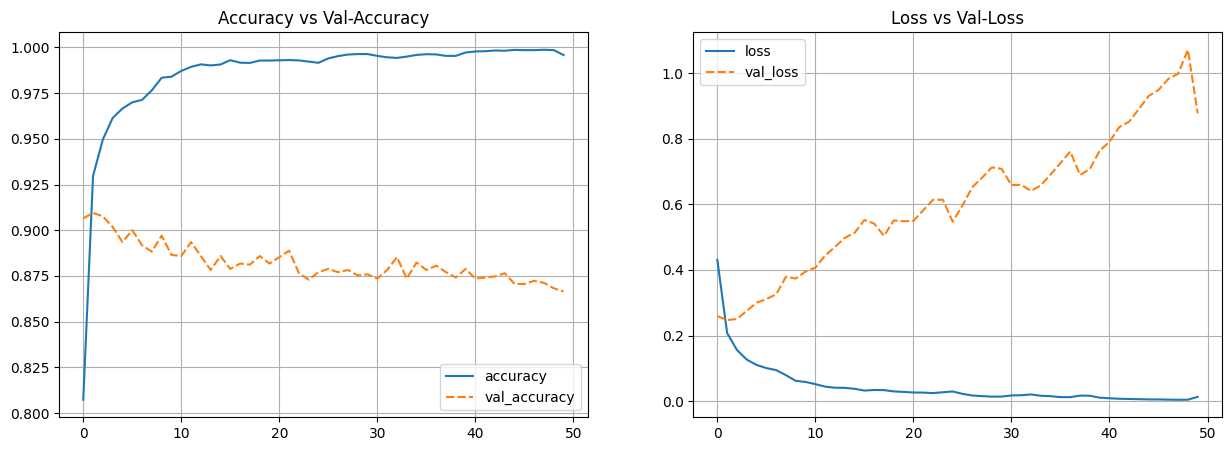

In [114]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Hasil dari grafik Accuracy vs Val-Accuracy:
-  Akurasi pada data train meningkat secara signifikan dan mencapai hampir 100%.
- Akurasi pada data validasi tidak meningkat secara signifikan dan justru sedikit menurun setelah beberapa epoch
- Model mengalami overfitting karena performa pada data train sangat baik, tetapi validasi tetap stagnan atau menurun

Hasil dari grafik Loss vs Val-Loss:
- Loss pada data train menurun secara drastis, menunjukkan bahwa model belajar dengan baik.
- Loss pada data validasi justru meningkat setelah beberapa epoch.
- Kenaikan val_loss menunjukkan bahwa model tidak dapat memprediksi dengan baik pada data yang belum pernah dilihat, adanya indikasi overfitting,  model menghafal data train tetapi tidak bisa memprediksi dengan baik pada data baru.

### Model Evaluation

In [115]:
#model evaluation
model_lstm_1.predict(X_test)

94/94 [==============================] - 4s 20ms/step


array([[0.9999587 ],
       [0.9999172 ],
       [0.9714846 ],
       ...,
       [0.9970622 ],
       [0.99981844],
       [0.99990237]], dtype=float32)

In [116]:
y_pred_train = np.where(model_lstm_1.predict(X_train) >= 0.5,1,0)
y_pred_test = np.where(model_lstm_1.predict(X_test) >= 0.5,1,0)

94/94 [==============================] - 2s 21ms/step


In [117]:
#Evaluasi Model di Data train 
from sklearn.metrics import classification_report
print(classification_report(y_train_encoded, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7650
           1       1.00      1.00      1.00      7650

    accuracy                           1.00     15300
   macro avg       1.00      1.00      1.00     15300
weighted avg       1.00      1.00      1.00     15300



KEmungkinan model mengalami overfitting terhadap data pelatihan. Overfitting artinya model hanya menghafal data pelatihan dan tidak bisa bekerja dengan baik pada data baru.

In [121]:
#Evaluasi Model di Data test
print(classification_report(y_test_encoded, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1500
           1       0.85      0.90      0.87      1500

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



Hasil dari classification report menunjukkan bahwa model memiliki performa yang sangat baik pada data train (100%) tetapi lebih rendah pada data uji (87%). Kemungkinan yang trejadi model overfitting, masalah distribusi data dan kompleksitas model

### LSTM with Transfer Learning

#### Import tensorflow-hub

In [32]:
#pip install tensorflow-hub==0.13.0


Note: you may need to restart the kernel to use updated packages.


In [118]:
import tensorflow_hub as tf_hub

TensorFlow Hub menyediakan model pre-trained yang sudah dilatih pada dataset besar seperti Google News, Wikipedia, atau Common Crawl, pada dataset ini menggunakan dari Google News. Model ini menghasilkan embedding yang lebih variatif, karena sudah dilatih dengan jumlah data yang sangat besar dan lebih mampu menangkap hubungan semantik antar kata.

In [119]:
#Pre-trained Embedding menggunakan data dari Google (ada di collab, kode.id)
url = 'https://www.kaggle.com/models/google/nnlm/tensorFlow2/tf2-preview-id-dim128-with-normalization/1'

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

In [120]:
#Set seed untuk reproducibility
#memastikan hasil training model yang konsisten/ tidak berubahsetiap kali dijalankan, mirip random_state
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed) #acakan data tetap sama
tf.random.set_seed(seed)

#Pastikan text_vectorization dan embedding sudah didefinisikan sebelumnya
#Definisikan arsitektur model LSTM
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))
model_lstm_2.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Bidirectional(LSTM(16, return_sequences=False, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Dense(10, activation='relu')) #ungsi aktivasi ReLU fungsi yang akan mengubah nilai input sesuai dengan aturan, nilai diatas 0 maka tetap, nilai negatif menjadi 0
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Dense(5, activation='relu'))
model_lstm_2.add(Dropout(0.1))

#output layer
model_lstm_2.add(Dense(1, activation='sigmoid'))


model_lstm_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Gunakan list []

model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_encoded, epochs=50, validation_data=(X_val, y_val_encoded), batch_size=256)


#untuk activation: https://keras.io/api/layers/activations/, https://www.tensorflow.org/api_docs/python/tf/keras/activations

Epoch 1/50
60/60 [==============================] - 35s 423ms/step - loss: 0.6911 - accuracy: 0.5119 - val_loss: 0.6769 - val_accuracy: 0.6000
Epoch 2/50
60/60 [==============================] - 25s 415ms/step - loss: 0.6614 - accuracy: 0.6252 - val_loss: 0.6382 - val_accuracy: 0.6612
Epoch 3/50
60/60 [==============================] - 24s 398ms/step - loss: 0.6374 - accuracy: 0.6534 - val_loss: 0.6173 - val_accuracy: 0.6753
Epoch 4/50
60/60 [==============================] - 23s 386ms/step - loss: 0.6256 - accuracy: 0.6659 - val_loss: 0.6153 - val_accuracy: 0.6759
Epoch 5/50
60/60 [==============================] - 23s 386ms/step - loss: 0.6189 - accuracy: 0.6730 - val_loss: 0.6005 - val_accuracy: 0.6894
Epoch 6/50
60/60 [==============================] - 22s 374ms/step - loss: 0.6085 - accuracy: 0.6796 - val_loss: 0.5885 - val_accuracy: 0.6976
Epoch 7/50
60/60 [==============================] - 22s 365ms/step - loss: 0.6009 - accuracy: 0.6908 - val_loss: 0.5877 - val_accuracy: 0.6882

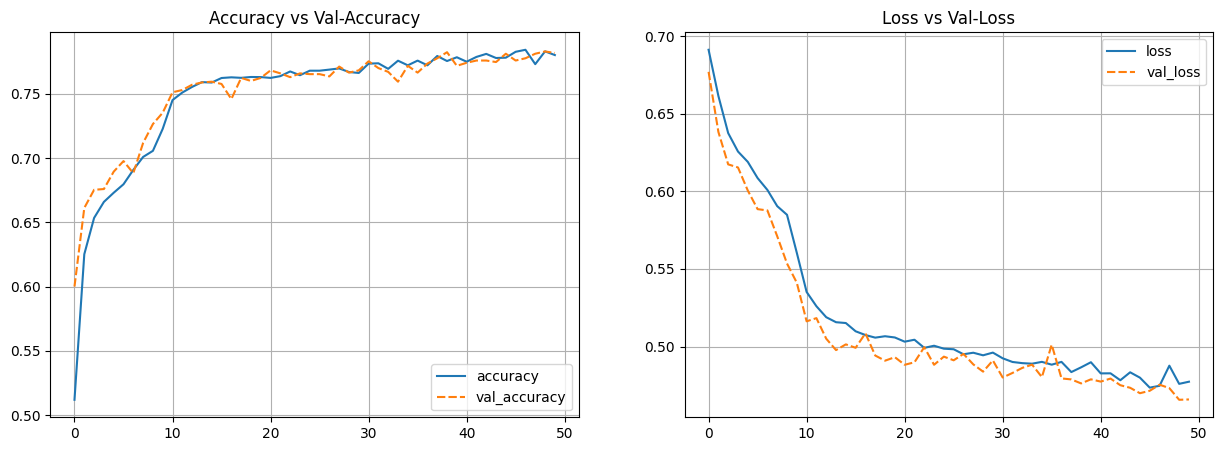

In [122]:
# Plot Training Results

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Hasil grafik accuracy vs val-accuracy:
- akurasi pelatihan (training accuracy) dan akurasi validasi (validation accuracy) meningkat secara bertahap.
 - Akurasi validasi tidak terlalu jauh berbeda dari akurasi pelatihan, menunjukkan bahwa model tidak mengalami overfitting yang parah. akurasi sudah cukup tinggi (sekitar 78-79%).

Hasil grafik loss vs val-loss: 
- Training loss maupun validation loss mengalami penurunan secara bertahap, yang menunjukkan bahwa model belajar dengan baik.
- Tidak ada indikasi overfitting yang jelas karena validation loss tidak meningkat drastis.

### Model Evaluation

In [123]:
#model evaluation
model_lstm_2.predict(X_test)

94/94 [==============================] - 4s 25ms/step


array([[0.65586734],
       [0.43543303],
       [0.5319433 ],
       ...,
       [0.9710461 ],
       [0.8718705 ],
       [0.9078208 ]], dtype=float32)

In [124]:
y_pred_train = np.where(model_lstm_2.predict(X_train) >= 0.5,1,0)
y_pred_test = np.where(model_lstm_2.predict(X_test) >= 0.5,1,0)

94/94 [==============================] - 3s 32ms/step


In [126]:
#hasil dari classification report
print(classification_report(y_train_encoded, y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      7650
           1       0.81      0.75      0.78      7650

    accuracy                           0.79     15300
   macro avg       0.79      0.79      0.79     15300
weighted avg       0.79      0.79      0.79     15300



- Model memiliki akurasi keseluruhan 79%. Ini menunjukkan bahwa model mampu mengklasifikasikan 79% data dengan benar.
- F1-Score menunjukkan performa model yang baik di kedua kelas, dengan nilai 0.80 untuk kelas 0 dan 0.78 untuk kelas 1.

In [125]:
#hasil dari classification report
print(classification_report(y_test_encoded, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1500
           1       0.80      0.76      0.78      1500

    accuracy                           0.78      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.78      0.78      0.78      3000



- Model memiliki akurasi 78% pada data uji, yang cukup baik untuk klasifikasi binary.
- Model cukup baik dalam mengklasifikasikan kedua kelas (kelas 0 dan kelas 1) meskipun ada sedikit penurunan di recall kelas 1 dibandingkan data pelatihan.
- Keseimbangan antara precision dan recall menunjukkan bahwa model bekerja  tidak bias terhadap salah satu kelas.


## SAVING MODEL

In [127]:
model_lstm_2.save("sentiment_lstm_model.h5")

## Kesimpulan

Kesimpulan dari project NLP sentimen analisis pada spotify antara lain:
- Sentimen : distribusi rating terlihat bahwa review pengguna cenderung ekstrem. Banyak pengguna memberikan rating sangat tinggi (5) atau sangat rendah (1), dengan jumlah rating menengah (2-4) lebih sedikit. Hal ini menunjukkan bahwa pengguna memiliki opini yang kuat terhadap Spotify, baik sangat puas atau sangat tidak puas.
- Kata-kata yang sering muncul dalam ulasan pengguna cenderung positif, seperti "love," "great," "easy," "awesome," "best," dan "premium. Sedangkan untuk ulasan negatif Kata-kata seperti "issue", "problem", "fix", "bug", dan "crashes" sering muncul menunjukkan pengguna mengalami gangguan teknis.
- LSTM 1: Model yang digunakan untuk mengklasifikasikan sentimen memiliki akurasi tinggi pada data pelatihan (100%), tetapi sedikit lebih rendah pada data pengujian (87%). Model kemungkinan overfitting, yaitu model terlalu baik dalam mengenali data pelatihan tetapi kurang mampu melatih ke data baru. Maka perlu dilakukan improvent model menggunakan transfer learning. Hasil dari LSTM dengan transfer Learning memiliki akurasi 78% pada data uji, yang cukup baik untuk klasifikasi binary.
- Model masih belum dapat ekspresi sentimen yang halus, terutama ketika ada penggunaan sarkasme, ungkapan kiasan, atau bahasa figuratif. Contoh: Ketika input kalimat "this app is bad" akan menampilkan sentiment positif karena  model belum mampu membedakan antara "so bad" yang berarti negative dengan "so bad" dalam konteks  positif (misalnya, "I love this app so bad").


Saran untuk project NLP ini:
- Masalah pengenalan sarkasme atau penggunaan bahasa figuratif, model masih kesulitan membedakan kalimat dengan ekspresi sentimen yang halus, seperti pada contoh "this app is bad". Beberapa langkah yang bisa diambil untuk meningkatkan ini antara lain, penggunaan model berbasis transformer seperti BERT atau RoBERTa yang telah terbukti lebih efektif dalam menangani konteks yang lebih kompleks dan memahami nuansa dalam bahasa, termasuk sarkasme. Menambahkan linguistic features atau semantic embeddings yang dapat mengenali pola bahasa yang lebih halus, serta memperkenalkan aturan atau tag khusus untuk mendeteksi sarkasme dan figurative language https://www.sciencedirect.com/science/article/abs/pii/S0925231220304689
- Untuk menambah akurasi model jugga dapat melakuakn percobaan pada hiddenlayer seperti activation function menjadi tanh atau varian ReLU seperti Leaky ReLU atau Parametric ReLU  maupun ElU. Selain itu juga bisa menggubah batch size,  64, 128, atau 256, dan bandingkan kinerja model dengan berbagai ukuran batch. Ukuran batch yang lebih besar bisa lebih stabil, tetapi lebih memerlukan memori dan waktu pelatihan. Menambahkan hidden layer, cobalah 1-2 layer LSTM/Bidirectional LSTM dengan jumlah unit yang cukup besar (misalnya, 32 hingga 64 unit), tergantung pada kompleksitas data.  Namun, terkadang lapisan LSTM tambahan bisa menyebabkan overfitting.Menyesuaikan DropOut (misalnya 0.3 atau 0.5) untuk melihat apakah model menjadi lebih tahan terhadap overfitting.


Rekomendasi Bisnis:

1. Perbaikan Bug dan Gangguan Teknis: Fokus pada perbaikan bug dan peningkatan stabilitas aplikasi untuk meningkatkan kepuasan pengguna.
2. Optimalkan Fitur Premium: Tawarkan lebih banyak fitur premium dan opsi harga fleksibel, serta tingkatkan kualitas audio (misalnya, Dolby Atmos, audio lossless).
3. Respon Cepat terhadap Keluhan: Tingkatkan pelayanan pelanggan dengan respons yang lebih cepat dan transparan terhadap keluhan.
4. Fitur Inovatif: Kembangkan fitur baru, seperti podcast interaktif atau fitur sosial untuk berbagi musik, untuk meningkatkan loyalitas pengguna.
5. Pemasaran Berdasarkan Ulasan Positif: Manfaatkan ulasan positif dalam kampanye pemasaran untuk menarik audiens baru.
6. Peningkatan Fitur Podcast: Perbanyak pilihan podcast eksklusif dan tingkatkan kualitas suara untuk memperkaya pengalaman pengguna.